[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed
NaN in data! Fixed.
[[0.14726591 0.00740369 0.28348061 0.90560406]
 [0.14726591 0.00740369 0.28348061 0.90560406]
 [0.16287018 0.00718103 0.28348061 0.93958657]
 ...
 [0.77007934 0.87085282 0.16723317 0.74721776]
 [0.76770556 0.87096412 0.16723317 0.75616054]
 [0.76770556 0.87096412 0.17036029 0.75616054]]


array([[0.15778525, 0.15778525, 0.15169792, ..., 0.14207663, 0.14276837,
        0.14276837],
       [0.15778525, 0.15169792, 0.15169792, ..., 0.14276837, 0.14276837,
        0.13516649],
       [0.15169792, 0.15169792, 0.14621493, ..., 0.14276837, 0.13516649,
        0.13516649],
       ...,
       [0.79062285, 0.79780486, 0.79780486, ..., 0.75404546, 0.75404546,
        0.77007934],
       [0.79780486, 0.79780486, 0.79073449, ..., 0.75404546, 0.77007934,
        0.77007934],
       [0.79780486, 0.79073449, 0.79073449, ..., 0.77007934, 0.77007934,
        0.76770556]])

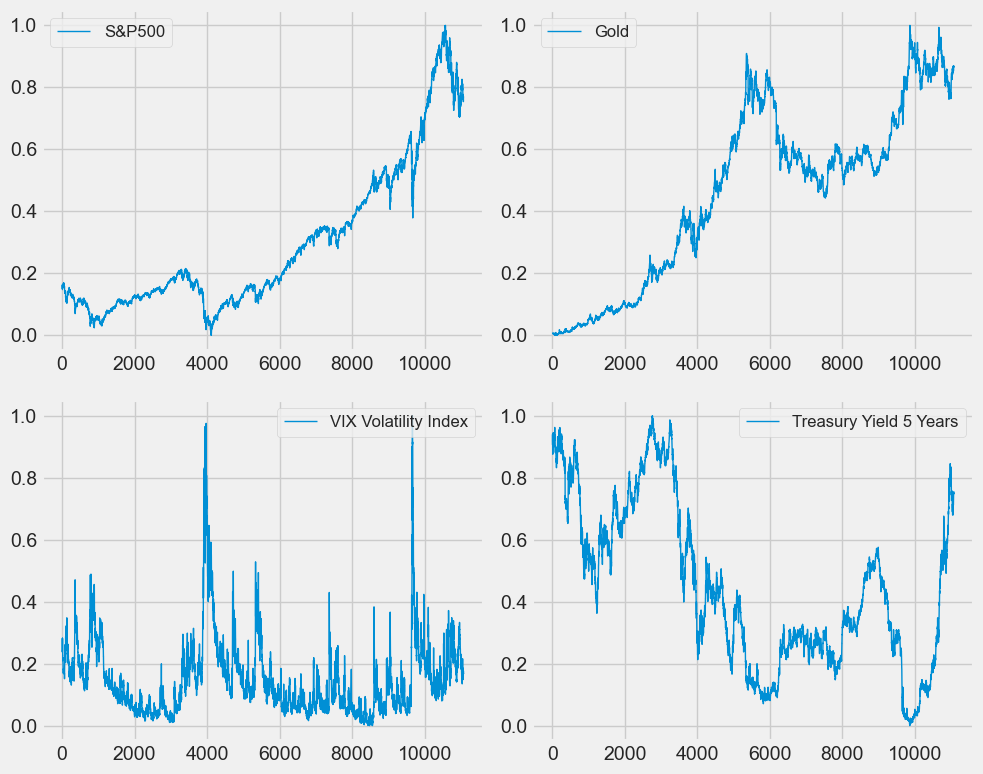

In [841]:
import sys
sys.path.insert(1, r"C:/Users/mihao/OneDrive - Univerza v Ljubljani/Doktorski_studij/Delo/Evolving transformer")
sys.path.insert(1, r"C:\Users\Miha\OneDrive - Univerza v Ljubljani\Doktorski_studij\Delo\Evolving transformer")
from importlib import reload 
import data.dataclass_module as dataclass_module
reload(dataclass_module)

input_length = 60
output_length = 30
output_steps_ahead = 1
database = dataclass_module.StockData(input_length,output_length,output_steps_ahead)
database.display_data_norm()

#print(database.data_dropped)
print(database.data_norm)

#print(database.datasnp_dropped)
scalar = database.scalar

database.dataset_input
database.dataset_output


In [842]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

'''
class Stockdataset(Dataset):
    def __init__(self, data, input_length, output_length = 1):
        self.data = data
        self.data = torch.from_numpy(data).float()#.view(-1)
        self.seq_len = input_length
        self.out_len = output_length

    def __len__(self):
        return len(self.data)-(self.seq_len+self.out_len+1)

    def __getitem__(self, index):
        return self.data[index : index+self.seq_len], self.data[index+self.seq_len+1: index+self.seq_len+self.out_len+1,0]
'''
     
size_training = int(len(database.data_norm)*0.90)
size_test = len(database.data_norm) - size_training
data_train, data_test = database.data_norm[0:size_training,:], database.data_norm[size_training:len(database.data_norm),:]

print(data_train.shape)
print(data_test.shape)

train_dataset = dataclass_module.Stockdataset(data_train, input_length, output_length)
test_dataset = dataclass_module.Stockdataset(data_test, input_length, output_length)
whole_dataset = dataclass_module.Stockdataset(database.data_norm, input_length, output_length)

print(test_dataset.__getitem__(1)[0].shape)
print(train_dataset.__getitem__(1)[0].shape)
print(whole_dataset.__getitem__(0)[0].shape)

training_batch_size = 513; #513
batch_size = training_batch_size
train_dataloader = DataLoader(train_dataset, batch_size, drop_last = True, shuffle=True) #drop_last = True ignores last batch is data is not divisable by batch_size
test_dataloader = DataLoader(test_dataset, batch_size, drop_last = True, shuffle=True)
whole_dataloader = DataLoader(whole_dataset, batch_size, drop_last = True, shuffle=False)
#whole_dataloader = DataLoader(train_dataset, 1, drop_last = False)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


(9965, 4)
(1108, 4)
torch.Size([60, 4])
torch.Size([60, 4])
torch.Size([60, 4])
cuda


In [843]:
import utils.loss_module as loss_module
reload(loss_module)

loss_fun_con = nn.MSELoss()
loss_fun_member = nn.CrossEntropyLoss()
loss_fun_centers = nn.MSELoss()
loss_fun_recon = nn.MSELoss()
loss_fun_assign = torch.nn.KLDivLoss(size_average=None, reduce=None, reduction="sum", log_target=True) #vhodi morajo bit logaritmirani
loss_fun_balance = torch.nn.KLDivLoss(size_average=None, reduce=None, reduction="sum", log_target=True) #vhodi morajo bit logaritmirani
loss_fun_Kmeans = loss_module.KMeansClusteringLoss()
loss_fun_local = loss_module.LocalityPreservingLoss()
loss_fun_DQA = loss_module.QuadraticDiscriminantAnalysis()
loss_fun_GMM = loss_module.GaussianMixtureLoss()
loss_fun_FCM = loss_module.FuzzyCMeansClusteringLoss()
loss_fun_overlap = loss_module.OverlappingLoss()
loss_fun_ContrastiveLoss = loss_module.FuzzyContrastiveLoss(0.2)
loss_fun_FuzzyCMeansLossWithPenalties = loss_module.FuzzyCMeansLossWithPenalties()
loss_fun_TotalVariationLoss = loss_module.TotalVariationLoss()
loss_fun_orthogonality_penalty = loss_module.OrthogonalityLoss()
loss_fun_EntropyLoss = loss_module.EntropyLoss(1)
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture


In [844]:
from utils import display_module
reload(display_module)
from utils import checks_module
reload(checks_module)

import models.evolving_system_module as evolving_system_module
reload(evolving_system_module)
import models.feed_forward_module as feed_forward_module
reload(feed_forward_module)

import models.LSTM_encoder_module as LSTM_encoder_module
reload(LSTM_encoder_module)

<module 'models.LSTM_encoder_module' from 'C:\\Users\\Miha\\OneDrive - Univerza v Ljubljani\\Doktorski_studij\\Delo\\Evolving transformer\\models\\LSTM_encoder_module.py'>

In [845]:
'''
class MultiheadSelfAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, sequence_length, dropout_rate=0.1):
        super(MultiheadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.sequence_length = sequence_length
        self.msa = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
        self.dropout1 = nn.Dropout(dropout_rate)  # Added dropout after MultiheadAttention
        self.ff_ant = feed_forward_module.FeedForward(embed_dim, embed_dim, embed_dim)
        self.dropout2 = nn.Dropout(dropout_rate)  # Added dropout after FeedForward
       

        self.fc_query = nn.Linear(embed_dim, embed_dim)
        self.fc_key = nn.Linear(embed_dim, embed_dim)

        # Batch normalization layers
        #self.bn = nn.BatchNorm1d(sequence_length,track_running_stats = False)
        self.ln = nn.LayerNorm(embed_dim)


    def forward(self, x, attn_mask=None):
        query = self.fc_query(x)
        key = self.fc_key(x)

        x_att, weights = self.msa(query, key, key, attn_mask=attn_mask, need_weights=True, average_attn_weights=False)
        x_att = self.dropout1(x_att)  # Apply dropout after MultiheadAttention
        x_residual = self.ln(self.ff_ant(x_att) + x)
        x_residual = self.dropout2(x_residual)  # Apply dropout after FeedForward

        return x_residual, weights
'''

import torch.nn as nn

class StackedAttentionNetwork(nn.Module):
    def __init__(self, embed_dim, num_heads, num_layers, seq_length):
        super(StackedAttentionNetwork, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.num_layers = num_layers
        self.seq_length = seq_length
        self.att_layers = nn.ModuleList([
            nn.MultiheadAttention(self.embed_dim, self.num_heads, batch_first=True,dropout=0.5)
            for _ in range(self.num_layers)
        ])

        
    def create_attention_mask(self, seq_length):
        # Create a 2D square matrix with seq_length dimensions.
        #mask = torch.tril(torch.ones((seq_length, seq_length)), diagonal=-1)
        mask = torch.triu(torch.ones((seq_length, seq_length)), diagonal=1)
        
        # Convert all values of 1 to -float('Inf') to prevent attending to future sequence elements.
        mask[mask == 1] = -float('Inf')

        return mask

    def forward(self, x):
        batch_size, seq_length, input_dim = x.size()
        all_att_weights = torch.empty((self.num_layers, self.num_heads, seq_length, seq_length))
        # Create attention mask and move it to the same device as x
        attn_mask = self.create_attention_mask(seq_length).to(x.device)
        for layer_idx in range(self.num_layers):
            x_res = x
            att_layer = self.att_layers[layer_idx]
            x, att_weights = att_layer(x, x, x, attn_mask=None, need_weights=True, average_attn_weights=False)
            x = x + x_res
            all_att_weights[layer_idx] = att_weights.mean(dim=0)

        return x, all_att_weights

In [846]:
from importlib import reload 
import utils.ellipse_module as ellipse_module
reload(ellipse_module)


<module 'utils.ellipse_module' from 'C:\\Users\\Miha\\OneDrive - Univerza v Ljubljani\\Doktorski_studij\\Delo\\Evolving transformer\\utils\\ellipse_module.py'>

In [847]:
import math

class PositionalEmbedding(nn.Module):
    def __init__(self, input_length, input_channels, embed_dimension):
        super(PositionalEmbedding, self).__init__()
        self.embedding = nn.Linear(input_channels, embed_dimension)
        self.positional_embedding = nn.Embedding(input_length, embed_dimension)

    def forward(self, x):
        sequence_length = x.size(1)
        positions = torch.arange(0, sequence_length, device=x.device).unsqueeze(0)
        positions = positions.expand(x.size(0), -1)
        pos_embedding = self.positional_embedding(positions)
        x = self.embedding(x) + pos_embedding
        return x

class CosinePositionalEncoding(nn.Module):
    def __init__(self, input_sequence_length, input_channels, embed_dimension):
        super(CosinePositionalEncoding, self).__init__()
        self.embedding = nn.Linear(input_channels, embed_dimension)
        self.embed_dimension = embed_dimension

    def forward(self, x):
        batch_size, seq_length, input_channels = x.size()
        positions = torch.arange(seq_length, device=x.device).float().unsqueeze(0)
        div_term = torch.exp(torch.arange(0, self.embed_dimension, 2, device=x.device).float() * (-math.log(10000.0) / self.embed_dimension))
        pos_embedding = torch.zeros(batch_size, seq_length, self.embed_dimension, device=x.device)
        pos_embedding[:, :, 0::2] = torch.sin(positions.unsqueeze(-1) * div_term)
        pos_embedding[:, :, 1::2] = torch.cos(positions.unsqueeze(-1) * div_term)
        x = self.embedding(x)
        x_embed = x + pos_embedding
        return x, x_embed


In [848]:
class SpatialAttention(nn.Module):
    def __init__(self, input_dim):
        super(SpatialAttention, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        scores = self.linear(x)
        weights = torch.softmax(scores, dim=1)
        out = weights * x
        return out, weights

In [849]:
import torch.nn as nn

class Evolver(nn.Module):
    def __init__(self, batch_size, par_input_channels, par_input_length, par_output_dim, par_output_length, par_hidden_size, par_num_layers,
                 par_num_heads, par_embed_dim, par_num_clusters, par_regressor_dim, par_exogenous_dim, par_order, par_latent_dim,min_clump,max_clamp):
        super(Evolver, self).__init__()
        self.num_layers = par_num_layers
        self.input_channels = par_input_channels
        self.input_length = par_input_length
        self.output_dim = par_output_dim
        self.output_length = par_output_length
        self.hidden_size = par_hidden_size
        self.num_clusters = par_num_clusters
        self.num_heads = par_num_heads
        self.embed_dim = par_embed_dim
        self.regressor_dim = par_regressor_dim
        self.exogenous_dim = par_exogenous_dim
        self.order = par_order
        self.latent_dim = par_latent_dim
        self.min_clump = min_clump
        self.max_clamp = max_clamp
        self.batch_size = batch_size

        self.embed = PositionalEmbedding(self.input_length, self.input_channels, self.embed_dim)
        self.spatial_attention = SpatialAttention(self.embed_dim)
        self.lstm = LSTM_encoder_module.LSTM_encoder(input_size=self.embed_dim, hidden_size=self.embed_dim, num_layers=1, dropout=0.5, bidirectional=False)
        self.MSAs_ant = StackedAttentionNetwork(self.embed_dim, self.num_heads, self.num_layers, self.input_length)
        self.MSAs_con = StackedAttentionNetwork(self.embed_dim, self.num_heads, self.num_layers, self.input_length)
        self.GRN_att = feed_forward_module.GRN(self.embed_dim,self.embed_dim)
        self.flat = nn.Flatten()

        self.fc_ant = feed_forward_module.Dense(self.input_length*self.embed_dim, self.hidden_size, self.latent_dim)
        self.lin_ant = feed_forward_module.Dense(self.input_length*self.embed_dim, self.hidden_size, self.latent_dim)

        self.GRN_ant = feed_forward_module.GRN(self.latent_dim, self.hidden_size)
        self.fc_exo = feed_forward_module.Dense(self.input_length*self.embed_dim, self.hidden_size, self.output_length+self.exogenous_dim)
        self.GRN_exo = feed_forward_module.GRN(self.output_length+self.exogenous_dim, self.hidden_size)
        self.fc_con = feed_forward_module.Dense(self.input_length*self.embed_dim, self.hidden_size, self.order)
        self.GRN_con = feed_forward_module.GRN(self.order, self.hidden_size)
        #self.fc_member = feed_forward_module.Dense(self.input_length, self.hidden_size, self.num_clusters)
        self.gate_con = nn.Sigmoid()
        self.evolve = evolving_system_module.EvolvingSystem(self.batch_size, self.input_length, self.output_dim, self.output_length, self.num_clusters, self.latent_dim, self.regressor_dim,
                                                            self.exogenous_dim, self.order, self.min_clump, self.max_clamp)
        self.softmax_member = torch.nn.Softmax(dim=2)
        self.sm = torch.nn.Softmax(dim=2)


    def forward(self, x):
        self.batch_size = x.size(0)
        self.x = x[:,:,0]
        x_embed = self.embed(x)
        #x_spatial_att, _ = self.spatial_attention(x_embed)
        lstm_out = self.lstm(x_embed)
        self.grn = self.GRN_att(lstm_out)
        self.att_ant, self.att_weights = self.MSAs_ant(lstm_out)

        x_flat = torch.sm(self.flat(self.att_ant).unsqueeze(1)) #.transpose(2, 1)


        #self.att_con, self.att_weights_con = self.MSAs_con(lstm_out)
        self.z = self.fc_ant(x_flat) #self.GRN_ant(self.fc_ant(self.att_ant))
        self.u = self.fc_exo(x_flat)
        #self.y = self.fc_con(x_flat)
        #self.member = self.softmax_member(self.fc_member(self.att_ant))

        #self.y, x_recon = self.evolve( (self.x[:,-self.order:]), self.z, self.u.squeeze(1))
        #self.y, x_recon = self.evolve( (self.x[:,-self.order:]), self.z, torch.zeros_like(self.u.squeeze(1)))
        #self.y, x_recon = self.evolve( self.gate_con(self.y).squeeze(1)*self.x[:,-self.order:], self.z, self.u.squeeze(1))
        self.y, x_recon = self.evolve(self.x[:,(-self.order-1):] , self.z,  self.u.squeeze(1))
        #self.y, x_recon = self.evolve( self.y.squeeze(1) , self.z, self.u.squeeze(1), self.member)

        return self.y, x_recon


In [850]:

par_num_heads = 16
par_num_clusters = 16
par_input_channels = 4
par_embed_dim = 512 #Must be devisible by 2 due to embedding and by the par_num_heads
par_output_dim = 1
par_hidden_size = 512
par_num_layers = 1
par_order = 3
par_exogenous_dim = 3
par_regressor_dim = par_order + par_exogenous_dim
par_latent_dim = 2
par_input_length = input_length
par_output_length = output_length
par_min_clump = 0
par_max_clump = 10


In [851]:
model = Evolver(batch_size, par_input_channels, par_input_length, par_output_dim, par_output_length, par_hidden_size, par_num_layers,
                  par_num_heads,par_embed_dim, par_num_clusters, par_regressor_dim, par_exogenous_dim, par_order, par_latent_dim, par_min_clump,par_max_clump).to(device)

c:\Users\Miha\anaconda3\envs\evolver310\lib\site-packages\torch\nn\modules\rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [852]:
import matplotlib.pyplot as plt

def plot_llm(llm_data):
    # Convert the data to a NumPy array
    llm_np = llm_data.detach().cpu().numpy()

    # Plot the data
    plt.plot(llm_np)
    plt.xlabel('Time')
    plt.ylabel('LLM')
    plt.title('LLM over Time')
    plt.show()

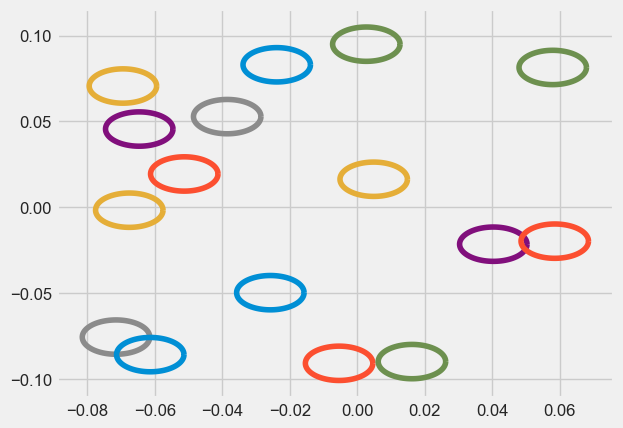

In [853]:
from IPython import display
from numpy.linalg import inv
import matplotlib.pyplot as plt
import pylab as pl

sigma_inv = model.evolve.sigma_inv
sigma_inv = torch.matmul((sigma_inv), torch.transpose((sigma_inv), 2, 1))
sigma = inv(sigma_inv.detach().cpu().numpy())[:,0:2,0:2]
mu = model.evolve.mu.detach().cpu().numpy()[:,0:2]
ellipse = ellipse_module.Ellipse(sigma,mu,1)
ellipse_points = ellipse.compute_confidence_ellipse()
ellipse_points = np.einsum('ijk->jik', ellipse_points)
plt.plot(ellipse_points[:,:,0],ellipse_points[:,:,1]) 
display.display(pl.gcf())   
display.clear_output(wait=True)


def compute_distibution(d2):
    q_num = (1 + d2).pow_(-1)
    q_den = (1 + d2).pow_(-1).sum(2).reshape(-1,1,1)
    q = torch.div(q_num, q_den)
    p_num = torch.div(torch.pow(q, 2), torch.sum(q, 0))
    p_den = torch.sum(torch.div(torch.pow(q, 2), torch.sum(q, 0)),-1).reshape(-1,1,1)
    p = torch.div(p_num, p_den)
    return p

In [860]:

def train(dataloader, loss_name, epoch):
    
    model.train()
    #alpha = 0.5
    loss_sum = 0
    x_ant = np.empty((0,1,par_latent_dim))    
    
    for batch, item in enumerate(dataloader):
        x, y = item
        x = x.to(device)
        y = y.to(device)
  
        if torch.isnan(x).any() == True:           
            print("ERROR training input data!")
        if torch.isnan(y).any() == True:           
            print("ERROR training output data!!")

        out, x_recon = model(x)
        
        if torch.isnan(out).any() == True:           
            print("ERROR Output!")
        if torch.isnan(x_recon).any() == True:           
            print("ERROR Decoder!")

        mu_target = torch.einsum('ij->ji',model.evolve.compute_centers(model.z))
        #sigma_target = model.evolve.compute_sigma(model.z).reshape(num_clusters,cluster_dim,cluster_dim)
        
        loss = torch.zeros(1).to(device)
        loss_kmeans = loss_fun_Kmeans(model.z, model.evolve.mu.detach())
        if torch.isnan(loss_kmeans) == True:           
            print("ERROR loss!")
        loss_FCM = loss_fun_FCM(model.z, model.evolve.mu, model.evolve.sigma_inv)

        #loss_GMM = loss_fun_GMM(model.z, model.evolve.mu, model.evolve.sigma_inv)       
        loss_con = loss_fun_con(out.reshape(batch_size, par_output_dim,-1), y.reshape(batch_size, par_output_dim,-1))
        
        if loss_name == 'all':

            #total_loss, loss_FCM_, loss_KM, equal_spread_loss, pull_towards_clusters_loss, column_norm_loss = loss_fun_FuzzyCMeansLossWithPenalties(model.z, model.evolve.mu, model.evolve.sigma_inv,1,1)
            #loss_mu = loss_fun_centers(mu_target, model.evolve.mu)
            #loss_sigma = loss_fun_sigma(sigma_target, model.evolve.mu)
            #loss_DQA = loss_fun_DQA(model.z, model.evolve.mu, model.evolve.sigma_inv)
            #loss_GMM = loss_fun_GMM(model.z, model.evolve.mu, model.evolve.sigma_inv)
            #loss_assign = loss_fun_assign(torch.nn.functional.log_softmax(model.evolve.psi, -1), compute_distibution(model.evolve.d2.reshape(-1,1,num_clusters)))
            #loss_recon = loss_fun_recon(x_recon, x[:,:,0].reshape(batch_size, 1, input_length))
            #loss_ballance = loss_fun_balance(model.evolve.compute_psi(model.z.detach())/batch_size,
            #                                torch.nn.functional.log_softmax(1/par_num_clusters*torch.ones(1,par_num_clusters),dim=1).to(device))
            loss_ballance = loss_fun_balance(torch.nn.functional.log_softmax(torch.mean(model.evolve.compute_psi(model.z),dim = 0),dim = 1),
                                             torch.nn.functional.log_softmax(1/par_num_clusters*torch.ones(1,par_num_clusters),dim=1).to(device))
            #loss_psi = -torch.sum(1/torch.log(model.evolve.compute_psi(model.z)))/batch_size
            #loss_psi = -torch.sum(torch.log(model.evolve.compute_psi(model.z))/batch_size)
            loss_overlap = loss_fun_overlap(model.evolve.mu, model.evolve.sigma_inv.detach())
            #loss_ContrastiveLoss =  loss_fun_ContrastiveLoss(model.z, model.evolve.mu.detach(), model.evolve.sigma_inv.detach())
            #TotalVariationLoss = loss_fun_TotalVariationLoss(model.evolve.x_LLM, model.evolve.y_LLM)
            #orthogonality_penalty =  loss_fun_orthogonality_penalty(model.evolve.x_LLM)
            #EntropyLoss = loss_fun_EntropyLoss(model.evolve.mu, model.evolve.sigma_inv, model.z)
            #loss_member = loss_fun_member(model.evolve.compute_psi(model.z), model.member)
            #SmoothRangeLossX = loss_fun_SmoothRangeLoss(model.evolve.x_LLM)
            #SmoothRangeLossY = loss_fun_SmoothRangeLoss(model.evolve.y_LLM)
            #loss = loss + loss_recon  + loss_centers
            #loss = loss + loss_recon*1e4  + loss_con*1e4 + loss_kmeans*1e2 + loss_ballance# loss + loss_recon  + loss_con + loss_FCM + loss_ContrastiveLoss#
            #+loss_ContrastiveLoss
            loss = loss + loss_con*1e4 + loss_FCM*1e4 + loss_overlap + loss_ballance #+ equal_spread_loss + pull_towards_clusters_loss +loss_ContrastiveLoss +loss_overlap#  + EntropyLoss  + 1e5*loss_ballance
    
            #if torch.all(loss_overlap > 5):
            #    loss = loss + TotalVariationLoss*1e-2
        '''
        if loss_name == 'encoder':
        
            loss_centers = loss_fun_centers(mu,model.evolve.mu)
            #loss_GMM = loss_fun_GMM(model.z, model.evolve.mu, model.evolve.sigma_inv)
            #loss_assign = loss_fun_assign(torch.nn.functional.log_softmax(model.evolve.psi, -1), compute_distibution(model.evolve.d2.reshape(-1,1,num_clusters)))
            loss_recon = loss_fun_recon(x_recon, x[:,:,0].reshape(batch_size, 1, input_length))
            loss_ballance = loss_fun_balance(torch.nn.functional.log_softmax(1/num_clusters*torch.ones(1,num_clusters).to(device),dim=1), torch.sum(model.evolve.compute_psi(model.z),0)/batch_size)

            #loss = loss + loss_recon  + loss_centers
            loss = loss + loss_recon#  + loss_centers               

          
        if loss_name == "cluster":

            loss_FCM = loss_fun_FCM(model.z, model.evolve.mu, model.evolve.sigma_inv)

            #loss_ballance = loss_fun_balance(1/num_clusters*torch.ones(1,num_clusters).to(device), torch.log(torch.sum(model.evolve.psi,0)/batch_size))

            loss_GMM = loss_fun_GMM(model.z, model.evolve.mu, model.evolve.sigma_inv)
            loss_centers = loss_fun_centers(mu,model.evolve.mu)
            #loss = loss + loss_FCM + loss_centers
            loss = loss + loss_centers  + loss_kmeans   
            #breakpoint()
            if torch.isnan(loss) == True:           
                print(f"ERROR loss_clust {loss_clust}!")
                breakpoint()
'''

        if loss_name == 'output':
            loss = loss + loss_con
            
        loss_sum = loss_sum + loss.item()  
        if torch.isnan(loss) == True:           
            print("ERROR loss!")

        x_ant = np.append(x_ant, model.z.detach().cpu().numpy(),axis=0)
        #hn = hn.detach() #detach hn is not a parameters and does not need to be updated!!!
        #cn = cn.detach()
        optimizer.zero_grad()
        loss.backward()
        if torch.isnan(loss) == True:           
            print("ERROR loss!")
        optimizer.step()

        if torch.any(torch.isnan(model.evolve.mu)) == True:  
            print("ERROR mu!")

        
        if (batch == np.floor(len(dataloader)/2)):  #(batch == len(dataloader) -1):    
            #if loss_name == "output" and True:  
                #display.display(pl.gcf())  
            #display.clear_output(wait=True)
            checks_module.check_gradient_health(model)
            clear_output(wait=True)
            
            #plt.plot(model.x[0,:].detach().cpu().numpy().reshape(input_length, 1))
            #plt.plot(x_recon[0,:,:].detach().cpu().numpy().reshape(input_length, 1))
            #plt.plot(x[0,:,0].detach().cpu().numpy().reshape(input_length, 1))  
            #plt.plot(torch.sum(model.att_weights[0,:,:],dim = 0).detach().cpu().numpy().reshape(input_length, 1))             
            #display_module.plot_llm(model.evolve.x_LLM)
            display_module.visualize_llm_square(model.evolve.y_LLM, epoch)
            
            print(f"Train loss: {loss_sum:>7f}")
                  # Extract the first channel from x and reshape the tensors
            x = x[:, :, 0].detach().cpu().numpy()
            #x_recon = x_recon[:, 0, :].cpu().numpy()
            y = y.detach().cpu().numpy()
            out = out[:, 0, :].detach().cpu().numpy()

            # Create time indices for the data
            time_indices_x = range(x.shape[1])
            time_indices_y = range(x.shape[1], x.shape[1] + y.shape[1])
            time_indices_y_all = range(x.shape[1]-par_order, x.shape[1] + y.shape[1])

            # Plot x (0th channel) and x_recon
            plt.figure(figsize=(10, 5))
            plt.plot(time_indices_x, x[-1], label='x (0th channel)')
            #plt.plot(time_indices_x, x_recon[0], label='x_recon')

            # Plot y and out
            plt.plot(time_indices_y, y[-1], label='y')
            plt.plot(time_indices_y, out[-1], label='y hat')
            plt.plot(time_indices_y_all, model.evolve.y_LLM_all[-1, 0, :].detach().cpu().numpy(), label='y hat')
            plt.legend()
            plt.title('Time Series Data')

                # Display clustering and membership
            display_module.display_clustering(model.evolve.sigma_inv, model.evolve.mu, model.z.detach().cpu().numpy())
            display_module.display_membership(model.evolve.compute_psi(model.z).detach().cpu().numpy(), model.z.detach().cpu().numpy(),epoch,'train')


            display_module.visualize_attention_weights(model.att_weights.detach().cpu(),epoch)
            plt.show() 
            
    return loss_sum, x_ant


'''
model.evolve.mu.grad
model.evolve.sigma_inv.grad
model.evolve.msa.in_proj_weight.grad
model.evolve.msa.in_proj_bias.grad
model.evolve.msa.out_proj.weight.grad
model.evolve.msa.out_proj.bias.grad
model.evolve.fc_ant.weight.grad
model.evolve.fc_ant.bias.grad
model.evolve.fc_con.weight.grad
model.evolve.fc_con.bias.grad
model.evolve.fc_emb.weight.grad
model.evolve.fc_emb.bias.grad
model.evolve.input_layer_norm.weight.grad
model.evolve.input_layer_norm.bias.grad
model.evolve.ant_norm.weight.grad
model.evolve.ant_norm.bias.grad
'''

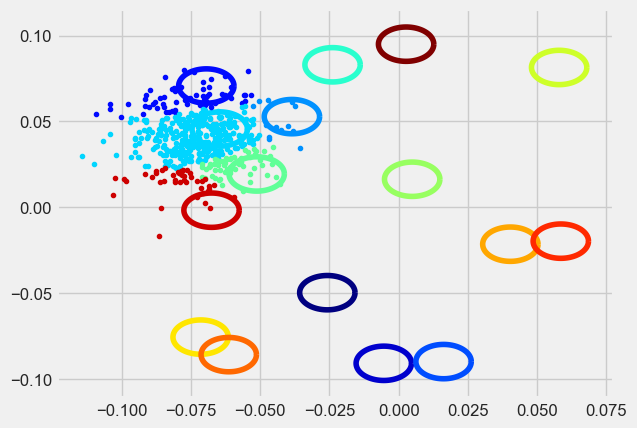

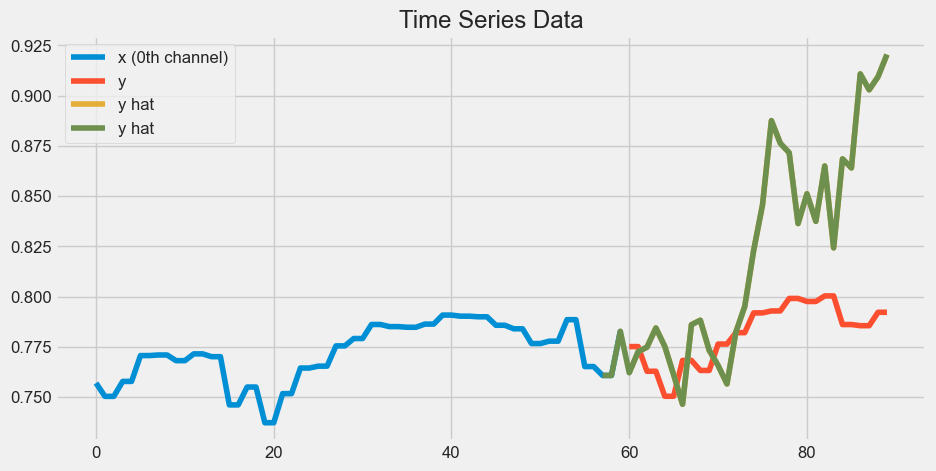

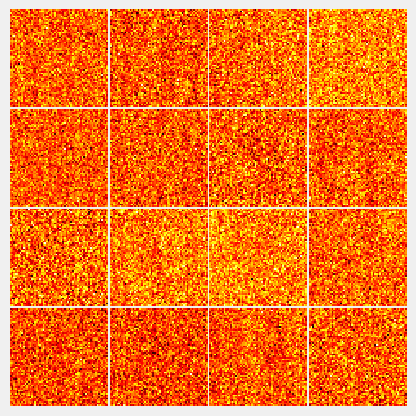

Test loss: 0.010259


In [855]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

def test(dataloader,epoch):
    loss_sum = 0

    # Turn off gradients for testing, saves memory and computations
    with torch.no_grad():
        for batch, (x,y) in enumerate(dataloader):
                
                print(f"Testing")
                x = x.to(device)
                y = y.to(device)
                out, x_recon = model(x)
                loss = loss_fun_con(out.reshape(batch_size, par_output_dim, -1), y.reshape(batch_size, par_output_dim, -1))
                loss_sum = loss_sum + loss.item()
                # Clear the console
                clear_output(wait=True)

                # Display clustering and membership
                display_module.display_clustering(model.evolve.sigma_inv, model.evolve.mu, model.z.detach().cpu().numpy())
                display_module.display_membership(model.evolve.compute_psi(model.z).detach().cpu().numpy(), model.z.detach().cpu().numpy(),epoch,'test')

                # Extract the first channel from x and reshape the tensors
                x = x[:, :, 0].detach().cpu().numpy()
                #x_recon = x_recon[:, 0, :].cpu().numpy()
                y = y.detach().cpu().numpy()
                out = out[:, 0, :].detach().cpu().numpy()

                # Create time indices for the data
                time_indices_x = range(x.shape[1])
                time_indices_y = range(x.shape[1], x.shape[1] + y.shape[1])
                time_indices_y_all = range(x.shape[1]-par_order, x.shape[1] + y.shape[1])

                # Plot x (0th channel) and x_recon
                plt.figure(figsize=(10, 5))
                plt.plot(time_indices_x, x[-1], label='x (0th channel)')
                #plt.plot(time_indices_x, x_recon[0], label='x_recon')

                # Plot y and out
                plt.plot(time_indices_y, y[-1], label='y')
                plt.plot(time_indices_y, out[-1], label='y hat')
                plt.plot(time_indices_y_all, model.evolve.y_LLM_all[-1, 0, :].detach().cpu().numpy(), label='y hat')
                plt.legend()
                plt.title('Time Series Data')
                plt.show()

                display_module.visualize_attention_weights(model.att_weights.detach().cpu(),epoch)
                plt.show() 
            
        print(f"Test loss: {loss_sum:>7f}")

    return loss_sum

loss_test = test(test_dataloader,0)


for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

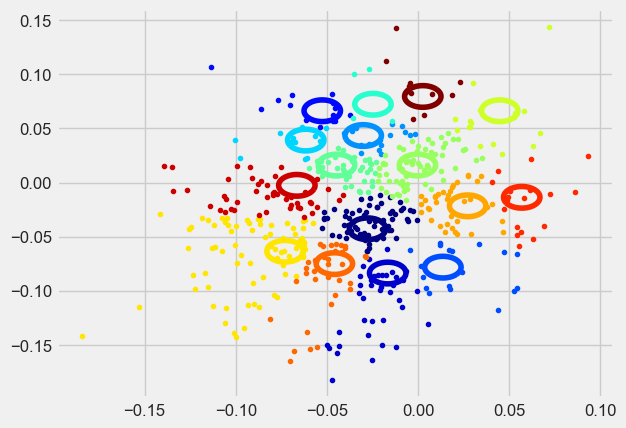

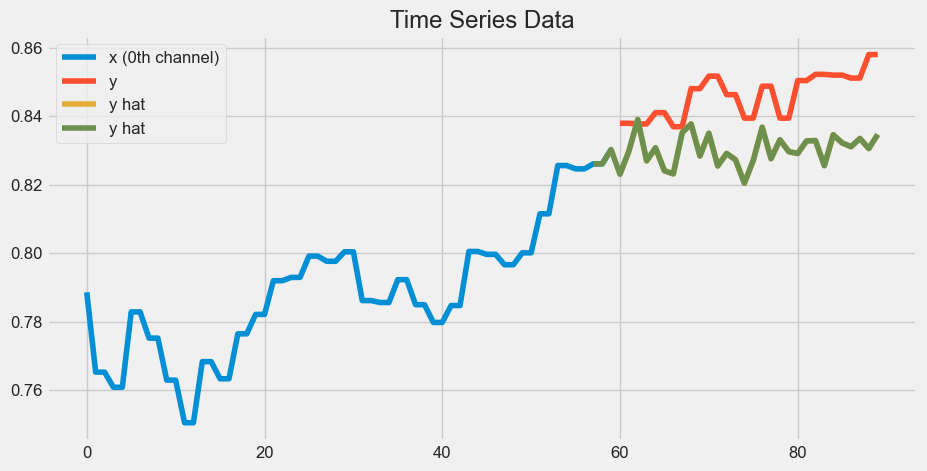

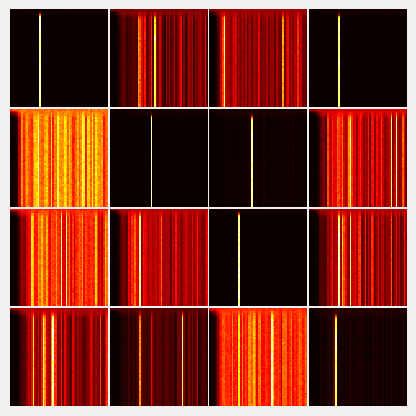

Test loss: 0.001071
Save model loss: 0.0010712353978306055 - 
Epoch 15 - all


c:\Users\Miha\anaconda3\envs\evolver310\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([513, 1, 60])) that is different to the input size (torch.Size([513, 60])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Gradient health for MSAs_ant.att_layers.0.out_proj.bias: Max abs val 1.341104507446289e-07, Avg abs val 2.926049680329612e-10, All finite values True


In [861]:
%matplotlib inline
best_model = float('inf')
#plt.ioff()
train_iterations = 100
batch_size = training_batch_size
for i in range(train_iterations):

    for p in model.parameters():
        p.requires_grad = True 

    loss_name = "all"
    lr = 1e-4
    epochs = 100
    model.evolve.min_clump = 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr = lr)    
    for epoch in range(epochs): 
        
        print(f"Epoch {epoch} - " + loss_name)
        loss_train_encoder, _ = train(train_dataloader,loss_name,epoch)
        if True | (np.mod(epoch,1) == 0): 
            #display_module.display_clustering(model.evolve.sigma_inv, model.evolve.mu, model.z.detach().cpu().numpy())
            #display_module.display_membership(model.evolve.compute_psi(model.z).detach().cpu().numpy(), model.z.detach().cpu().numpy())
            #display_module.display_attention(model.att_weights[0,:,:].detach().cpu().numpy())
            
            #plt.plot(torch.mean(model.att_weights[0,:,:],0).detach().cpu().numpy())
            loss_test = test(test_dataloader,epoch)
            if (best_model > loss_test):
                best_model = loss_test
                torch.save(model, "model_evolve_cluster.pt")
                print(f"Save model loss: {loss_test} - ")
            #display_module.visualize_attention_weights(model.att_weights.detach().cpu(),epoch)

In [ ]:
'''
loss_test = test(test_dataloader)
if (best_model > loss_train_encoder):
    best_model = loss_train_encoder
    torch.save(model, "model_evolve_cluster_07_24.pt")
'''

In [ ]:
import math
from sklearn.metrics import mean_squared_error
import numpy as np
def calculate_metrics(dataloader):
    pred_arr = []
    y_arr = []
    with torch.no_grad():
        #hn, cn = model.init()
        for batch, item in enumerate(dataloader):
            x, y = item
            x, y = x.to(device), y.to(device)
            x = x.view(input_length, batch_size, input_dim)
            pred = model(x)
            pred = pred.view(batch_size, -1,1)
            pred = np.repeat(pred.detach().cpu().numpy(),input_dim,axis=2)
            pred = scalar.inverse_transform(pred)[:,0]
            y = np.repeat(y.detach().cpu().numpy(),input_dim,axis=1)
            y = scalar.inverse_transform(y)[:,0]
            pred_arr = pred_arr + list(pred)
            y_arr = y_arr + list(y)

        return math.sqrt(mean_squared_error(y_arr,pred_arr))



In [ ]:
from torchinfo import summary
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

#print(model.evolve.fc_con.bias)
#print(model.evolve.fc_con.weight)
#print(model.evolve.sigma_inv)
#print(model.evolve.mu)

#summary(model,[(input_length, 1, input_dim),(num_layers, 1, hidden_size),(num_layers, 1, hidden_size)])
model = torch.load("model_evolve_cluster.pt", map_location=torch.device('cuda:0'))

summary(model, input_size=(2, par_input_length, par_input_channels))
#model.load_state_dict(torch.load("model_evolve_cluster.pt"))

#model.eval()


In [ ]:

#print(f"Train MSE loss {calculate_metrics(train_dataloader)}")
#print(f"Test MSE loss {calculate_metrics(test_dataloader)}")

In [ ]:
history -g


In [ ]:
'''
%matplotlib inline
import time
import pylab as pl
from IPython import display
#fig2, axes2 = plt.subplots(figsize = (5, 3), linewidth=0.5)
#line1, = axes2.plot(np.zeros(output_length))
#line2, = axes2.plot(np.zeros(output_length))

import matplotlib.pyplot as plt
import time

def simulate(dataloader):
    pred_arr = []
    y_arr = []
    with torch.no_grad():
        hn, cn = model.init()
        for batch, item in enumerate(dataloader):
            x, y = item
            x, y = x.to(device), y.to(device)
            pred,hn,cn = model(x.reshape(input_length, batch_size, input_dim), hn, cn) #[0]
            pred = pred.detach().cpu().numpy().reshape(-1,1)
            #pred = pred.view(1, output_length)
            #pred = np.repeat(pred.detach().cpu().numpy(),input_dim,axis=1)
            #pred = scalar.inverse_transform(pred)[:,0].reshape(-1)
            #y = np.repeat(y.detach().cpu().numpy().reshape(-1,1),input_dim,axis=1)
            #y = scalar.inverse_transform(y)[:,0].reshape(-1)
            y = y.detach().cpu().numpy().reshape(-1,1)
            pred_arr = np.append( pred_arr, pred)
            y_arr = np.append(y_arr, y)

            
            #axes2.cla()  
            #line1.set_ydata(pred_arr)
            #line2.set_ydata(y_arr)
            plt.plot(pred_arr,'b')
            plt.plot(y_arr,'r')
            #fig2.tight_layout()
            #fig2.show()

            display.display(pl.gcf())   
            display.clear_output(wait=True)
            time.sleep(0.1)
            
    return pred_arr, y_arr

batch_size = 1
whole_pred_arr, whole_y_arr = simulate(whole_dataloader)
'''